In [4]:
import os

ix = os.getcwd().index('umich-mads-capstone-project')
ROOT_PATH = os.path.join(os.getcwd()[:ix], 'umich-mads-capstone-project')

import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

patient_data_path = os.path.join(ROOT_PATH, 'data/cx14/cx14-inference.csv')

In [2]:
df = pd.read_csv(patient_data_path)
df.head()

,index,file_path,target,split,cx14_densenet_proba
0,104901,00028131_011.png,0,train,0.169289
1,51471,00013002_013.png,0,train,0.159643
2,59038,00014615_008.png,1,train,0.408438
3,63279,00015628_026.png,1,train,0.468423
4,47416,00012045_048.png,0,train,0.786816


In [3]:
def get_y_test_y_score(proba_col_name=None) -> None:
    if not proba_col_name:
        raise Exception('Must specify proba_col_name!')
    df_test = df[df['split']=='test']
    return df_test.target, df_test[proba_col_name]

def print_metrics(ytest, y_score, model_name):
    # Threshold tuning
    precision, recall, thresh = metrics.precision_recall_curve(y_test, y_score)
    fscore = (2 * precision * recall) / (precision + recall)
    ix = np.argmax(fscore)
    y_pred = (y_score >= thresh[ix]).astype(int)

    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    roc_auc = metrics.roc_auc_score(y_test, y_score)
    avg_precision = metrics.average_precision_score(y_test, y_score)
    
    print('Model:\t\t{}'.format(model_name))
    print('Best Threshold:\t\t{:.3f}'.format(thresh[ix]))
    print('Precision:\t\t{:.3f}'.format(precision))
    print('Recall:\t\t\t{:.3f}'.format(recall))
    print('F1:\t\t\t{:.3f}'.format(f1))
    print('ROC AUC:\t\t{:.3f}'.format(roc_auc))
    print('Average Precision:\t{:.3f}'.format(avg_precision))

In [4]:
y_test, y_score = get_y_test_y_score(proba_col_name='cx14_densenet_proba')
print_metrics(y_test, y_score, model_name='CX-14 Baseline Model')

Model:		CX-14 Baseline Model
Best Threshold:		0.283
Precision:		0.551
Recall:			0.734
F1:			0.630
ROC AUC:		0.770
Average Precision:	0.619


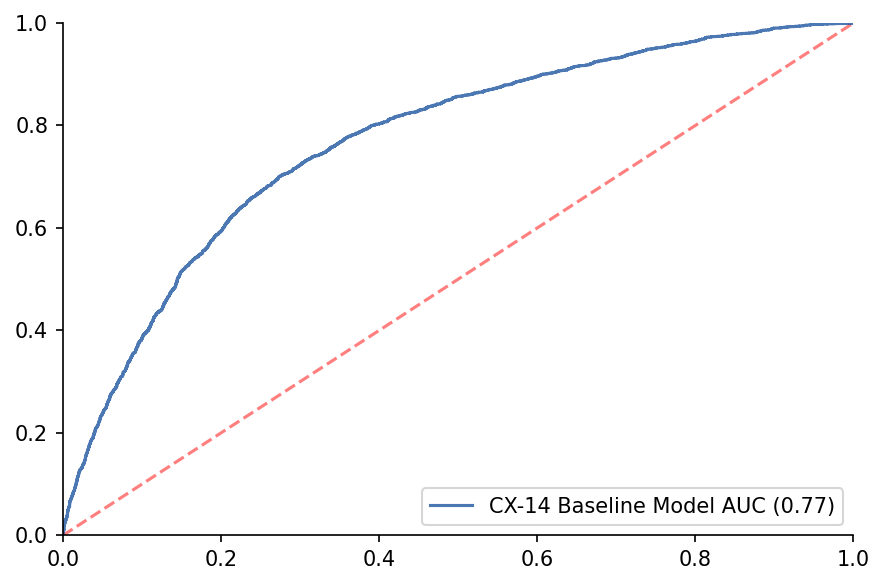

In [5]:
def plot_aurocs(save_path:str=None) -> None:
    fig = plt.figure(dpi=150)
    ax = fig.gca()
    
    ax.plot([0, 1], [0, 1], '--', color='red', alpha=.5)
    
    label, col, color = ('CX-14 Baseline Model', 'cx14_densenet_proba', '#0f4999')
    y_test, y_score = get_y_test_y_score(proba_col_name=col)
    tpr, fpr, _ = metrics.roc_curve(y_test, y_score)
    roc_auc = metrics.roc_auc_score(y_test, y_score)
    ax.plot(tpr, fpr, alpha=.75, color=color, label='{} AUC ({:.2f})'.format(label, roc_auc))
        
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(loc='lower right')
    fig.tight_layout()
    
    if save_path:
        plt.savefig(save_path, format='png')
        
    plt.show()
    
plot_aurocs('/home/tstrebel/repos/umich-mads-capstone-project/figures/cx14-auroc.png')

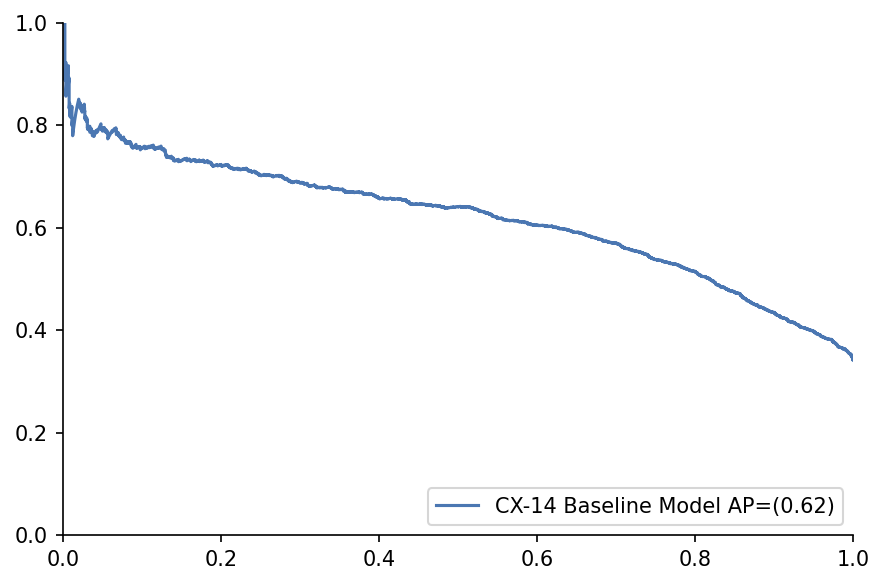

In [7]:
def plot_auprcs(save_path:str=None) -> None:
    fig = plt.figure(dpi=150)
    ax = fig.gca()
    
    label, col, color = ('CX-14 Baseline Model', 'cx14_densenet_proba', '#0f4999')
    y_test, y_score = get_y_test_y_score(proba_col_name=col)
    precision, recall, _ = metrics.precision_recall_curve(y_test, y_score)
    ap = metrics.average_precision_score(y_test, y_score)
    ax.plot(recall, precision, alpha=.75, color=color, label='{} AP=({:.2f})'.format(label, ap))
        
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(loc='lower right')
    fig.tight_layout()
    
    if save_path:
        plt.savefig(save_path, format='png')
        
    plt.show()
    
plot_auprcs('/home/tstrebel/repos/umich-mads-capstone-project/figures/cx14-auprc.png')